In [51]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from search_model import SearchModel
from gradient_model import GradientModel
from hybrid_model import HybridModel

from sklearn.datasets import Flo

In [52]:
# attempt to learn a function that returns the sum of inputs

num_examples = 1000
num_iterations = 30
input_size = 10

X = torch.randn(num_examples, input_size)
y = X.sum(dim=1, keepdim=True)

In [53]:
search_model = SearchModel(input_size=input_size, hidden_sizes=[5, 4], output_size=1,
                weight_range=[-5, 5], bias_range=[-5, 5],
                weight_range_size=100, bias_range_size=100)

print("Initial loss for search model before searching")
search_model.evaluate(X, y)

Initial loss for search model before searching
MSE loss: 134999.53125


In [54]:
history_search = search_model.search(X, y, num_iterations)

Iteration 1: Loss improved from 134999.5312 to 34.1496
Iteration 2: Loss improved from 34.1496 to 34.1496
Search converged. Stopping early.


In [55]:
print("Final loss for search model after searching")
search_model.evaluate(X, y)

Final loss for search model after searching
MSE loss: 34.14955520629883


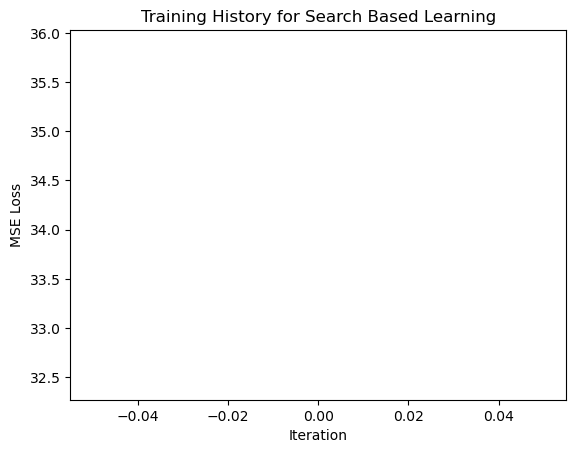

In [56]:
plt.plot(history_search)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training History for Search Based Learning')
plt.show()

In [57]:
gradient_model = GradientModel(input_size=input_size, hidden_sizes=[5, 4], output_size=1,
                weight_range=[-5, 5], bias_range=[-5, 5])

print("Initial loss for gradient model before searching")
gradient_model.evaluate(X, y)

Initial loss for gradient model before searching
MSE loss: 837.1102294921875


In [58]:
learning_rate = 1e-4
gradient_model.initialize_parameters()
history_grad_lr4 = gradient_model.train_model(X, y, num_iterations, learning_rate)

Epoch: 1, Loss: 3400.2881
Epoch: 2, Loss: 3398.9431
Epoch: 3, Loss: 3397.5977
Epoch: 4, Loss: 3396.2529
Epoch: 5, Loss: 3394.9094
Epoch: 6, Loss: 3393.5652
Epoch: 7, Loss: 3392.2224
Epoch: 8, Loss: 3390.8799
Epoch: 9, Loss: 3389.5381
Epoch: 10, Loss: 3388.1958
Epoch: 11, Loss: 3386.8550
Epoch: 12, Loss: 3385.5142
Epoch: 13, Loss: 3384.1748
Epoch: 14, Loss: 3382.8354
Epoch: 15, Loss: 3381.4966
Epoch: 16, Loss: 3380.1584
Epoch: 17, Loss: 3378.8201
Epoch: 18, Loss: 3377.4827
Epoch: 19, Loss: 3376.1455
Epoch: 20, Loss: 3374.8101
Epoch: 21, Loss: 3373.4746
Epoch: 22, Loss: 3372.1404
Epoch: 23, Loss: 3370.8064
Epoch: 24, Loss: 3369.4736
Epoch: 25, Loss: 3368.1416
Epoch: 26, Loss: 3366.8098
Epoch: 27, Loss: 3365.4785
Epoch: 28, Loss: 3364.1479
Epoch: 29, Loss: 3362.8186
Epoch: 30, Loss: 3361.4893


In [59]:
print(f"Final loss for gradient model after gradient based training, learning rate: {learning_rate}")
gradient_model.evaluate(X, y)

Final loss for gradient model after gradient based training, learning rate: 0.0001
MSE loss: 3360.160888671875


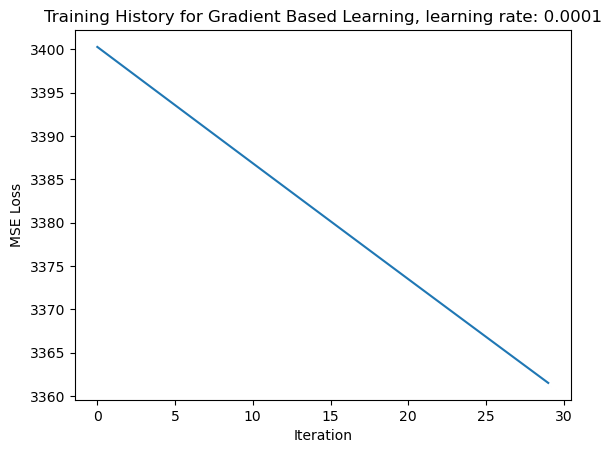

In [60]:
plt.plot(history_grad_lr4)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title(f'Training History for Gradient Based Learning, learning rate: {learning_rate}')
plt.show()

In [61]:
learning_rate = 1e-3
gradient_model.initialize_parameters()
history_grad_lr4 = gradient_model.train_model(X, y, num_iterations, learning_rate)

Epoch: 1, Loss: 62000.7344
Epoch: 2, Loss: 61823.8320
Epoch: 3, Loss: 61647.0273
Epoch: 4, Loss: 61470.5859
Epoch: 5, Loss: 61294.5078
Epoch: 6, Loss: 61118.8008
Epoch: 7, Loss: 60943.4219
Epoch: 8, Loss: 60768.4023
Epoch: 9, Loss: 60593.7852
Epoch: 10, Loss: 60419.5547
Epoch: 11, Loss: 60245.7617
Epoch: 12, Loss: 60072.3789
Epoch: 13, Loss: 59899.4062
Epoch: 14, Loss: 59726.8984
Epoch: 15, Loss: 59554.8203
Epoch: 16, Loss: 59383.2969
Epoch: 17, Loss: 59212.4062
Epoch: 18, Loss: 59042.3008
Epoch: 19, Loss: 58872.5078
Epoch: 20, Loss: 58703.1641
Epoch: 21, Loss: 58534.2852
Epoch: 22, Loss: 58365.9023
Epoch: 23, Loss: 58197.9922
Epoch: 24, Loss: 58030.5859
Epoch: 25, Loss: 57863.5938
Epoch: 26, Loss: 57697.0430
Epoch: 27, Loss: 57530.9805
Epoch: 28, Loss: 57365.3633
Epoch: 29, Loss: 57200.2305
Epoch: 30, Loss: 57035.6367


In [62]:
print(f"Final loss for gradient model after gradient based training, learning rate: {learning_rate}")
gradient_model.evaluate(X, y)

Final loss for gradient model after gradient based training, learning rate: 0.001
MSE loss: 56871.703125


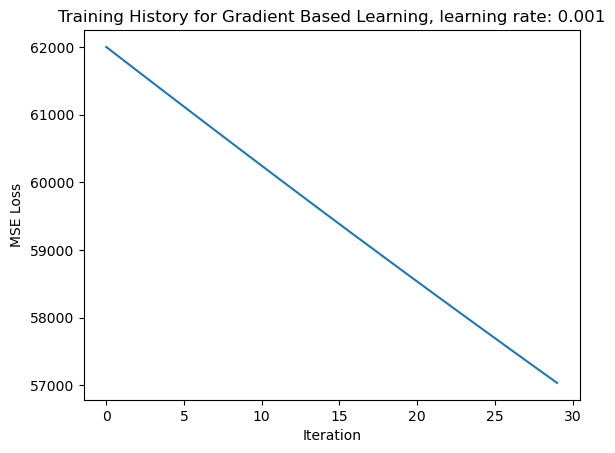

In [63]:
plt.plot(history_grad_lr4)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title(f'Training History for Gradient Based Learning, learning rate: {learning_rate}')
plt.show()

In [64]:
learning_rate = 1e-2
gradient_model.initialize_parameters()
history_grad_lr4 = gradient_model.train_model(X, y, num_iterations, learning_rate)

Epoch: 1, Loss: 93771.8125
Epoch: 2, Loss: 91144.9141
Epoch: 3, Loss: 88578.8594
Epoch: 4, Loss: 86071.3750
Epoch: 5, Loss: 83624.1328
Epoch: 6, Loss: 81237.5469
Epoch: 7, Loss: 78909.6562
Epoch: 8, Loss: 76640.4219
Epoch: 9, Loss: 74429.8281
Epoch: 10, Loss: 72277.1484
Epoch: 11, Loss: 70185.0781
Epoch: 12, Loss: 68151.6875
Epoch: 13, Loss: 66175.2969
Epoch: 14, Loss: 64254.6992
Epoch: 15, Loss: 62391.6055
Epoch: 16, Loss: 60583.6641
Epoch: 17, Loss: 58830.5859
Epoch: 18, Loss: 57130.0195
Epoch: 19, Loss: 55479.9102
Epoch: 20, Loss: 53879.8711
Epoch: 21, Loss: 52327.8789
Epoch: 22, Loss: 50823.1602
Epoch: 23, Loss: 49364.9648
Epoch: 24, Loss: 47955.3477
Epoch: 25, Loss: 46592.0273
Epoch: 26, Loss: 45271.9766
Epoch: 27, Loss: 43994.3516
Epoch: 28, Loss: 42757.7266
Epoch: 29, Loss: 41559.6172
Epoch: 30, Loss: 40399.7422


In [65]:
print(f"Final loss for gradient model after gradient based training, learning rate: {learning_rate}")
gradient_model.evaluate(X, y)

Final loss for gradient model after gradient based training, learning rate: 0.01
MSE loss: 39276.65625


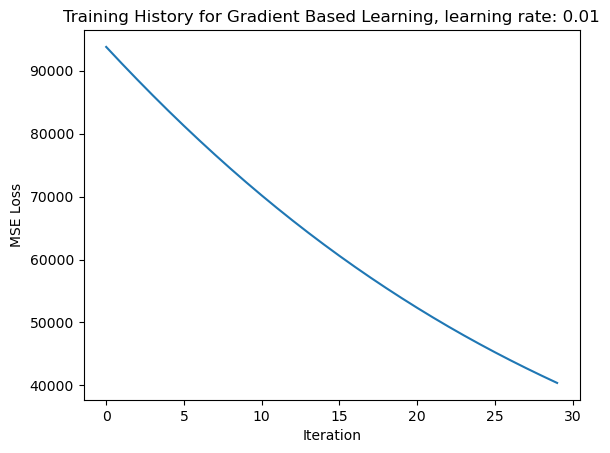

In [66]:
plt.plot(history_grad_lr4)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title(f'Training History for Gradient Based Learning, learning rate: {learning_rate}')
plt.show()

In [67]:
learning_rate = 1e-1
gradient_model.initialize_parameters()
history_grad_lr4 = gradient_model.train_model(X, y, num_iterations, learning_rate)

Epoch: 1, Loss: 15403.5215
Epoch: 2, Loss: 11986.0703
Epoch: 3, Loss: 9253.4033
Epoch: 4, Loss: 7113.1992
Epoch: 5, Loss: 5452.8223
Epoch: 6, Loss: 4171.1099
Epoch: 7, Loss: 3199.9021
Epoch: 8, Loss: 2460.5745
Epoch: 9, Loss: 1899.6870
Epoch: 10, Loss: 1479.0844
Epoch: 11, Loss: 1164.4020
Epoch: 12, Loss: 929.6169
Epoch: 13, Loss: 750.9095
Epoch: 14, Loss: 610.6680
Epoch: 15, Loss: 501.7072
Epoch: 16, Loss: 415.3779
Epoch: 17, Loss: 345.2015
Epoch: 18, Loss: 288.2407
Epoch: 19, Loss: 240.5842
Epoch: 20, Loss: 200.2201
Epoch: 21, Loss: 166.6476
Epoch: 22, Loss: 139.6145
Epoch: 23, Loss: 117.3085
Epoch: 24, Loss: 98.7670
Epoch: 25, Loss: 83.7542
Epoch: 26, Loss: 71.6443
Epoch: 27, Loss: 61.6375
Epoch: 28, Loss: 53.3279
Epoch: 29, Loss: 46.7444
Epoch: 30, Loss: 41.5927


In [68]:
print(f"Final loss for gradient model after gradient based training, learning rate: {learning_rate}")
gradient_model.evaluate(X, y)

Final loss for gradient model after gradient based training, learning rate: 0.1
MSE loss: 37.541751861572266


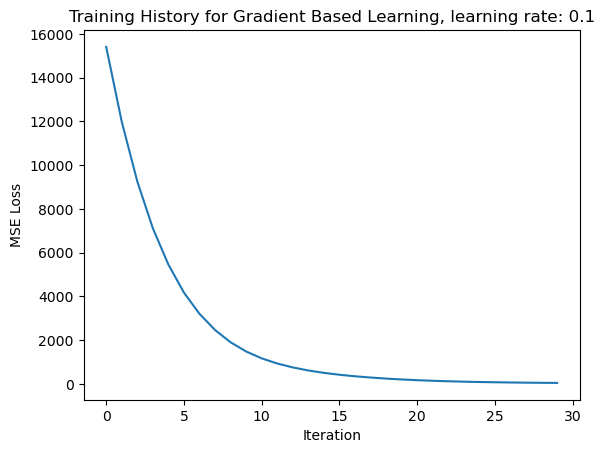

In [69]:
plt.plot(history_grad_lr4)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title(f'Training History for Gradient Based Learning, learning rate: {learning_rate}')
plt.show()

In [70]:
hybrid_model = HybridModel(input_size=input_size, hidden_sizes=[5, 4], output_size=1,
                weight_range=[-5, 5], bias_range=[-5, 5],
                weight_range_size=100, bias_range_size=100)


print("Initial loss for hybrid model before training")
hybrid_model.evaluate(X, y)

Initial loss for hybrid model before training
MSE loss: 12614.1103515625


In [71]:
learning_rate = 1e-3
history_hybrid = hybrid_model.search_and_train(X, y, num_iterations, learning_rate, num_iterations)

Searching for optimal parameters
Iteration 1: Loss improved from 12614.1104 to 84330.8828
Iteration 2: Loss improved from 84330.8828 to 81.1933
Iteration 3: Loss improved from 81.1933 to 34.1495
Iteration 4: Loss improved from 34.1495 to 34.1495
Search converged. Stopping early.
Starting gradient based training
Epoch: 1, Loss: 34.1495
Epoch: 2, Loss: 30.6568
Epoch: 3, Loss: 28.2276
Epoch: 4, Loss: 26.7586
Epoch: 5, Loss: 26.0330
Epoch: 6, Loss: 25.7409
Epoch: 7, Loss: 25.5998
Epoch: 8, Loss: 25.4300
Epoch: 9, Loss: 25.1524
Epoch: 10, Loss: 24.7600
Epoch: 11, Loss: 24.2867
Epoch: 12, Loss: 23.7902
Epoch: 13, Loss: 23.3275
Epoch: 14, Loss: 22.9434
Epoch: 15, Loss: 22.6623
Epoch: 16, Loss: 22.4848
Epoch: 17, Loss: 22.3910
Epoch: 18, Loss: 22.3472
Epoch: 19, Loss: 22.3165
Epoch: 20, Loss: 22.2692
Epoch: 21, Loss: 22.1890
Epoch: 22, Loss: 22.0747
Epoch: 23, Loss: 21.9372
Epoch: 24, Loss: 21.7946
Epoch: 25, Loss: 21.6651
Epoch: 26, Loss: 21.5621
Epoch: 27, Loss: 21.4921
Epoch: 28, Loss: 21.4

In [72]:
print(f"Final loss for hybrid model after training, learning rate: {learning_rate}")
hybrid_model.evaluate(X, y)

Final loss for hybrid model after training, learning rate: 0.001
MSE loss: 21.40924835205078


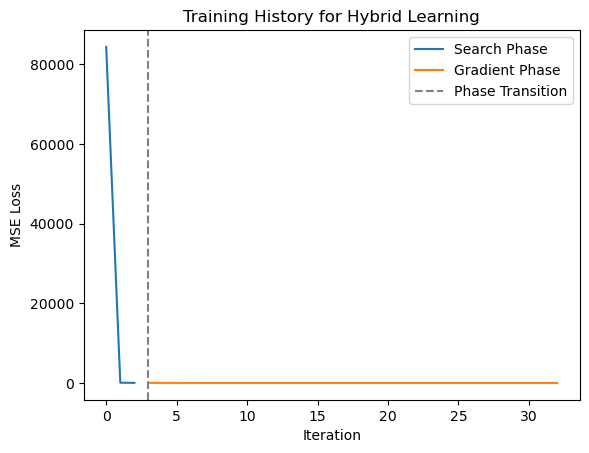

In [73]:
history_hybrid_search, history_hybrid_grad = history_hybrid
history_combined = np.concatenate(history_hybrid, axis=0)

search_length = len(history_hybrid_search)

plt.plot(history_hybrid_search, label='Search Phase')
plt.plot(np.arange(search_length, search_length + len(history_hybrid_grad)), 
         history_hybrid_grad, label='Gradient Phase')

plt.axvline(x=search_length, color='gray', linestyle='--', label='Phase Transition')

plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training History for Hybrid Learning')

plt.legend()

plt.show()